## Cars4U Pricing Case Study

**Context**

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

**Objective**

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 

**Data Description** 

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

**Data Dictionary**

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs
 

In [2]:
# Help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# (Greatlearning Login)

<IPython.core.display.Javascript object>

# 2. Loading and exploring the data

In this section the goals are to load the data into my Jupyter Notebook and then to check its basic properties. This will include the dimension, column types and names, and missing value counts.

In [3]:
df = pd.read_csv("used_cars_data.csv", index_col=0)
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

# Looking at 10 random rows
# Setting the random seed via np.random.seed so that I get the same random results every time
np.random.seed(2)
df.sample(n=10)

# (Greatlearning Login)

There are 7253 rows and 13 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,7.15,6.64
6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,7.88,3.90
5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,10.25,4.79
4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,40.62,13.50
2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,49.49,11.50
4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.41
6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,NaN,5.0,7.88,NaN
2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,33.36,5.23


<IPython.core.display.Javascript object>

* Power and Price have a NaN in the column
* Mileage, Engine, and Power have integers, floats, and strings within the data
* Name column has a lot of different brands 
* Location column has a lot of different cities
* There are several cars with high kilometers driven

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.3+ KB


<IPython.core.display.Javascript object>

* Dependent variable is the price of the used car in INR Lakhs, is of float type
* 'Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power' are of object type. 
* Year and Kilometers_Driven is of integer type

In [5]:
# creating a copy of the data so that original data remains unchanged
data = df.copy()

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [6]:
# checking for duplicate values in the data
data.duplicated().sum()

# (Greatlearning Login)

1

<IPython.core.display.Javascript object>

In [7]:
# checking the names of the columns in the data
print(data.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


<IPython.core.display.Javascript object>

In [8]:
# looking at which columns have the most missing values
data.isnull().sum().sort_values(ascending=False)

# (Greatlearning Login)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in four columns (Price, Power, Seats, Engine, and Mileage).

In [9]:
# Let's look at the statistical summary of the data
data.describe(include="all").T

# (Greatlearning Login)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* We can see the mean of New_Price is more than doubles the Price of used cars (21.30 to 9.47); which is a strong suggestion as to why used cars are in popular demand based on the 'law of demand' which states, **"According to the law of demand, the quantity bought of a good or service is a function of price—with all other things being equal. If nothing else changes, people will buy less of something when its price rises. They'll buy more when its price falls”. * (“Law of Demand”)

* Mahindra XUV500 W8 2WD is the top vehicle sold with a frequency of 55 within the dataset.

* 2013 is the average manufacturing year

* There are a lot of NaNs within the data.

**From the data overview, there are many columns in the data that need to be preprocessed before they can be used for analysis. **


# 3. Data Processing 


In [10]:
# dropping the missing values in Price column as it is the target variable
data.dropna(subset=["Price"], inplace=True)

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [11]:
# Reset the dataframe index
data.reset_index(inplace=True, drop=True)

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [12]:
# Creating a copy of the data to avoid any changes of original data
df1 = data.copy()

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [13]:
# checking for duplicate values in the data
df1.duplicated().sum()

# (Greatlearning Login)

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data.

In [14]:
# checking missing values in rest of the data
df1.isnull().sum().sort_values(ascending=False)

# (Greatlearning Login)

Power                143
Seats                 42
Engine                36
Mileage                2
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# filtering non-numeric columns
cat_columns = df1.select_dtypes(exclude=np.number).columns
cat_columns

# (Greatlearning Login)

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

<IPython.core.display.Javascript object>

In [19]:
# Seeing the unique values in the columns with missing data
cat_col = [
    "Name",
    "Location",
    "Fuel_Type",
    "Transmission",
    "Owner_Type",
    "Mileage",
    "Engine",
    "Power",
    "Seats",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df1[column].value_counts())
    print("-" * 50)
    
# (Greatlearning Login)

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64
--------------------------------------------------
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64
-

<IPython.core.display.Javascript object>

### Name, Mileage, Engine, Power, and Seats have a lot of unique values

In [21]:
# checking entries with no Name
df1[df1.Name.isnull()]

# (Greatlearning Login)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


<IPython.core.display.Javascript object>

In [26]:
# let's check the summary of the Name column
df1["Name"].describe()

# (Greatlearning Login)

count                       6019
unique                      1876
top       Mahindra XUV500 W8 2WD
freq                          49
Name: Name, dtype: object

<IPython.core.display.Javascript object>

In [22]:
# checking entries with no Mileage
df1[df1.Mileage.isnull()]

# (Greatlearning Login)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


<IPython.core.display.Javascript object>

In [27]:
# let's check the summary of the Mileage column
df["Mileage"].describe()

# (Greatlearning Login)

count          7251
unique          450
top       17.0 kmpl
freq            207
Name: Mileage, dtype: object

<IPython.core.display.Javascript object>

In [23]:
# checking entries with no Engine
df1[df1.Engine.isnull()]

# (Greatlearning Login)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.880,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.000,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.580,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.580,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,120.000,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,4.550,1.93


<IPython.core.display.Javascript object>

In [28]:
# let's check the summary of the Engine column
df["Engine"].describe()

# (Greatlearning Login)

count        7207
unique        150
top       1197 CC
freq          732
Name: Engine, dtype: object

<IPython.core.display.Javascript object>

In [24]:
# checking entries with no Power
df1[df1.Power.isnull()]

# (Greatlearning Login)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,NaN,5.0,11.685,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,4.550,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,NaN,5.0,4.550,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,NaN,5.0,4.550,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,NaN,5.0,4.550,1.67
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.8 kmpl,1248 CC,NaN,5.0,7.880,4.10
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0 kmpl,1086 CC,NaN,5.0,4.550,0.95
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,4.550,1.75


<IPython.core.display.Javascript object>

In [29]:
# let's check the summary of the Power column
df["Power"].describe()

# (Greatlearning Login)

count       7078
unique       385
top       74 bhp
freq         280
Name: Power, dtype: object

<IPython.core.display.Javascript object>

In [25]:
# checking entries with no Seats
df1[df1.Seats.isnull()]

# (Greatlearning Login)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,7.650,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.880,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.000,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.580,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.580,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,120.000,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,13.580,1.70


<IPython.core.display.Javascript object>

In [30]:
# let's check the summary of the Seats column
df["Seats"].describe()

# (Greatlearning Login)

count    7200.000000
mean        5.279722
std         0.811660
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

<IPython.core.display.Javascript object>

### Dropping Name, Mileage, Engine, Power, and Seats columns because they have too many none values


In [39]:
df2 = df1.copy()

df2.drop(["Name", "Power", "Engine", "Seats", "Mileage"], axis=1, inplace=True)

# let's check the summary of our data
df2.describe(include="all").T

# (Greatlearning Login)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New_Price,6019.0,NaN,NaN,NaN,21.499855,24.332922,3.91,7.88,11.3,21.77,375.0
Price,6019.0,NaN,NaN,NaN,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


<IPython.core.display.Javascript object>

## Visualize the data


### Univariate Analysis

In [40]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    # (Greatlearning Login)

<IPython.core.display.Javascript object>

### year

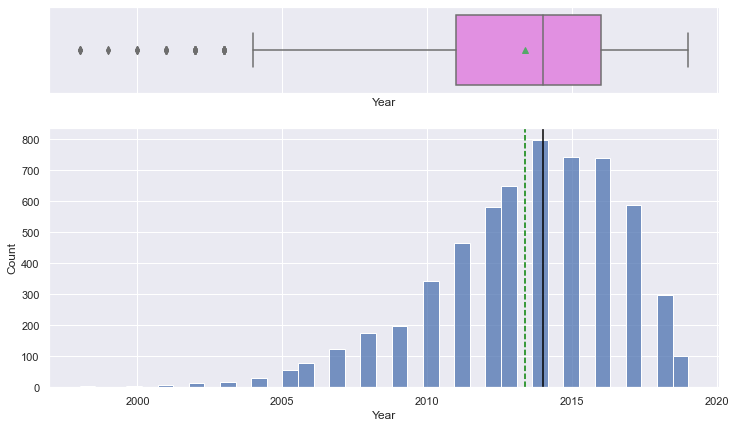

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(df2, "Year")

# (Greatlearning Login)

* The manufacturing year of the cars is left skewed, with several outliers less than 2005. The manufacturing year median is 2014 and the mean is 2013.

### Price

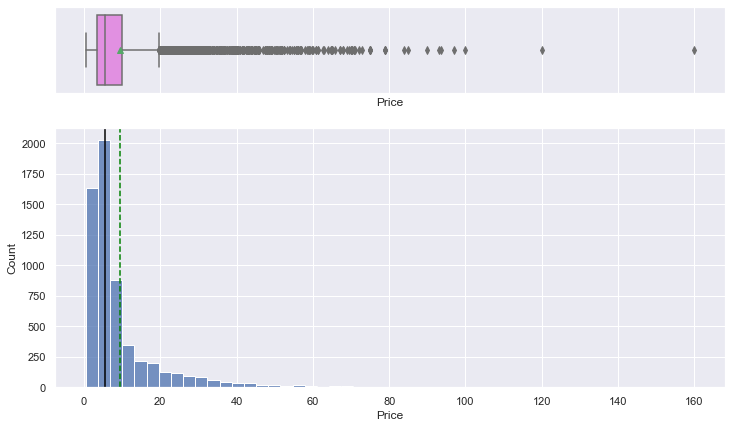

<IPython.core.display.Javascript object>

In [42]:
histogram_boxplot(df2, "Price", bins=50)

# (Greatlearning Login)

* The price of the used cars in INR Lakhs is right skewed, with several outliers. The median of price of a used car is around 5 INR Lakhs and the mean is around 9 INR Lakhs

### New_Price

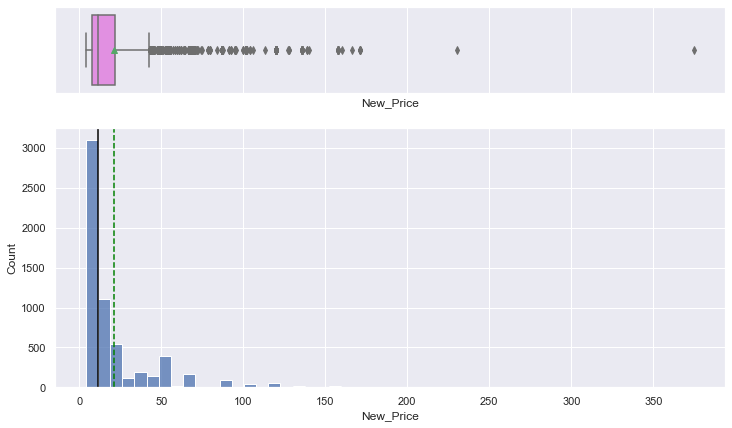

<IPython.core.display.Javascript object>

In [43]:
histogram_boxplot(df2, "New_Price", bins=50)

# (Greatlearning Login)

* The price of a new car of the same model in INR Lakhs is right skewed, with several outliers.The median of price of a new car is around 11 INR Lakhs and the mean is around 21 INR Lakhs

### Kilometers_Driven

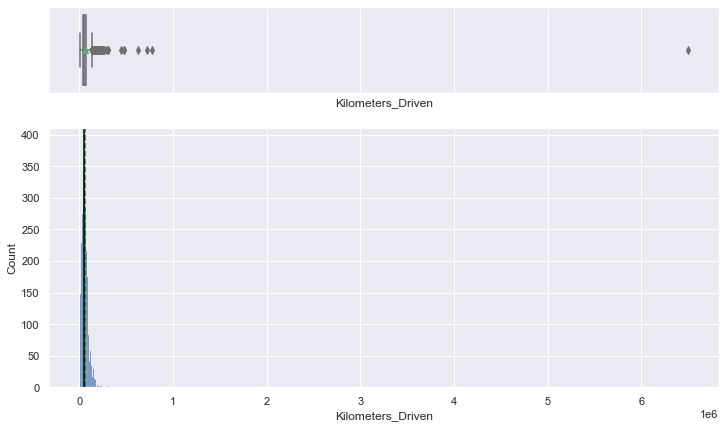

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(df2, "Kilometers_Driven")

# (Greatlearning Login)

* The histogram nor the boxplot gives clear visual inference for this data. Per my statistical summary I have better insights for this data. Median kilometers driven 53416.0 and mean kilometers driven 58699. There are several outliers. 

In [86]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# (Greatlearning Login)

<IPython.core.display.Javascript object>

### Location

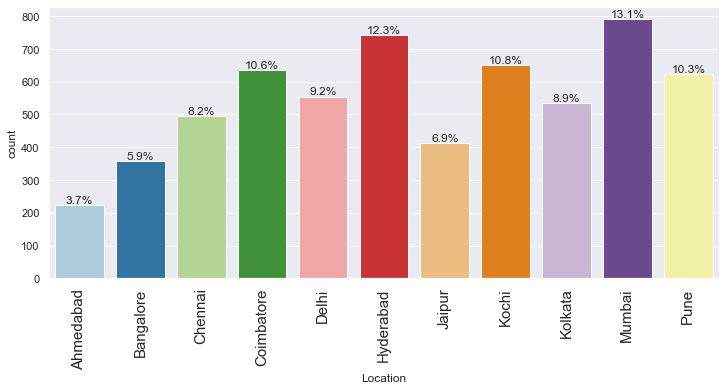

<IPython.core.display.Javascript object>

In [87]:
labeled_barplot(df2, "Location", perc=True)

# (Greatlearning Login)

* Most popular location in which the car is being sold or is available for purchase is Mumbai, followed by Hyderabad

### Fuel_Type

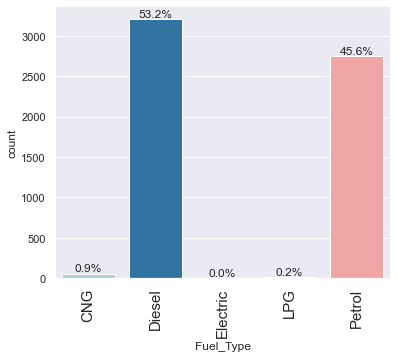

<IPython.core.display.Javascript object>

In [88]:
labeled_barplot(df2, "Fuel_Type", perc=True)

# (Greatlearning Login)

* Diesel is the most popular fuel type, very little interest in CNG and LPG fuel types, and no interest in Electric

### Transmission

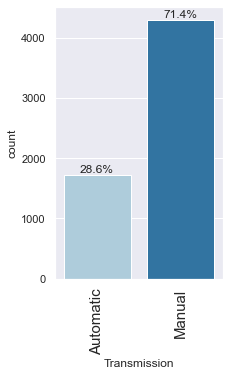

<IPython.core.display.Javascript object>

In [89]:
labeled_barplot(df2, "Transmission", perc=True)

# (Greatlearning Login)

* Manual transmissions are the most popular

### Owner_Type

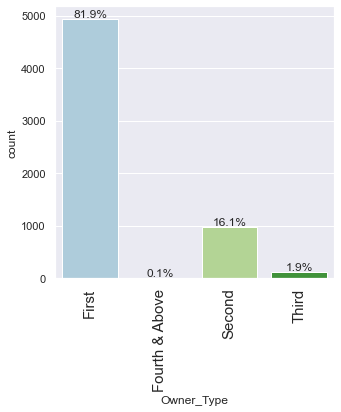

<IPython.core.display.Javascript object>

In [90]:
labeled_barplot(df2, "Owner_Type", perc=True)

# (Greatlearning Login)

* The most popular type of owner is the First owner type. Very few Third, Fourth & Above owner types

## Bivariate analysis

**We will not consider the tag columns for correlation check as they have only 0 or 1 values.**

In [91]:
# creating a list of non-tag columns
corr_cols = [item for item in df2.columns if "tag" not in item]
print(corr_cols)

# (Greatlearning Login)

['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'New_Price', 'Price']


<IPython.core.display.Javascript object>

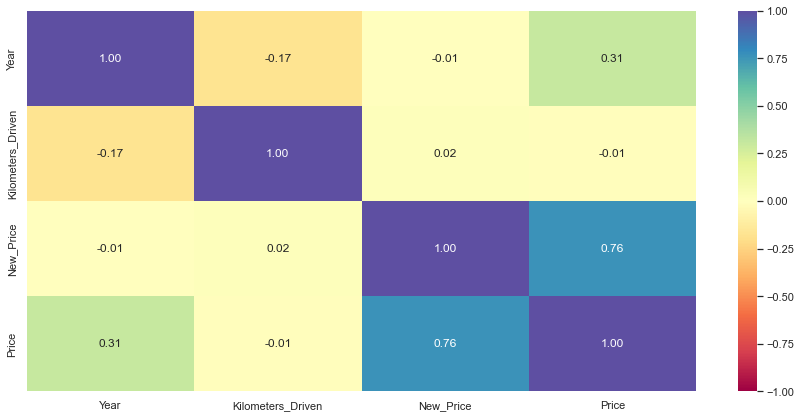

<IPython.core.display.Javascript object>

In [92]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df2[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# (Greatlearning Login)

* Price and New_Price columns are very highly correlated.
* Price and Year columns are moderately correlated.


### Checking the relation of different varaibles with Price

<Figure size 1440x360 with 0 Axes>

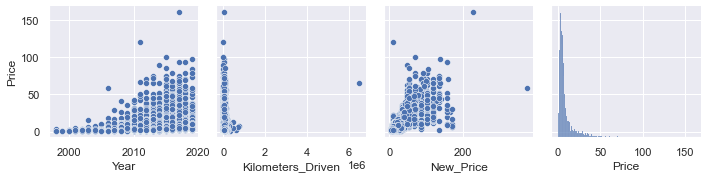

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(20, 5))
sns.pairplot(df2, y_vars="Price")
plt.show()

# (Greatlearning Login)

* Later year models price increases 
* Lower kilometers driven increases the price
* The lower the New Price the greater quantity sold
* Lower prices increase quantity sold

### Let's check the variation in Price with some of the categorical columns in our data

**Location vs Price**

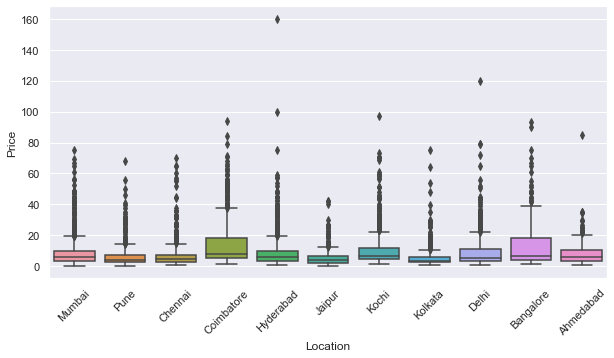

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=df2)
plt.xticks(rotation=45)
plt.show()

# (Greatlearning Login)

* Prices in Coimbatore and Bangalore are higher with 75% of their prices ranging from 20 INR Lakhs and lower.

### Year vs Price

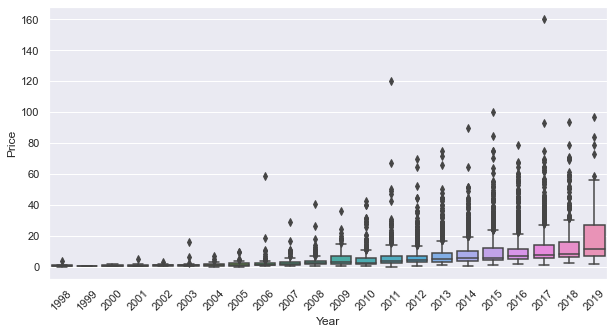

<IPython.core.display.Javascript object>

In [95]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Year", y="Price", data=df2)
plt.xticks(rotation=45)
plt.show()

# (Greatlearning Login)

* The later the manufacturing year, the greater the price. 

### Fuel_Type vs Price

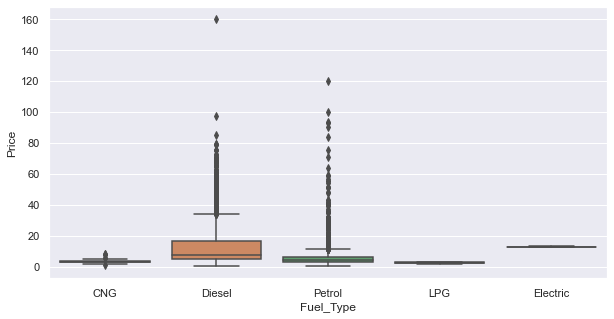

<IPython.core.display.Javascript object>

In [96]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df2)
plt.show()

# (Greatlearning Login)

* Diesel fuel type is the most popular and price covers all price points with several outliers and rightly skewed.

### Transmission vs Price

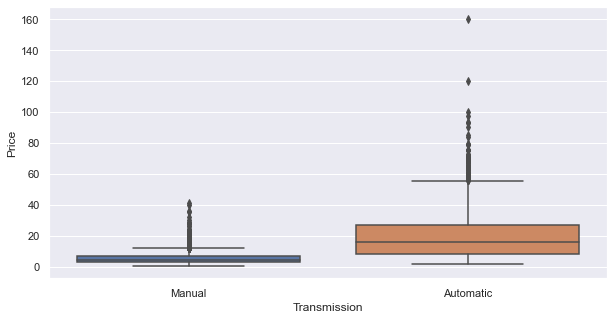

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=df2)
plt.show()

# (Greatlearning Login)

* Automatic transmission price is higher than manual transmission. Hence the Law of Demand is displayed again, where "people will buy less of something when its price rises." (“Law of Demand”)


* Two seater's price are more because generally these are sportcars that are more expenive
* Four seaters are generally luxury sedans so price in this category is reasonable
* Five seats is the most popular and reasonably priced for family cars. 

## Summary of EDA

**Data Description:**

* Dependent variable is the price of the used car in INR Lakhs, is of *float*  type
* 'Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power' are of object type. 
* Year and Kilometers_Driven is of integer type
* We can see the mean of New_Price is more than doubles the Price of used cars (21.30 to 9.47); which is a strong suggestion as to why used cars are in popular demand based on the 'law of demand' which states, **"According to the law of demand, the quantity bought of a good or service is a function of price—with all other things being equal. If nothing else changes, people will buy less of something when its price rises. They'll buy more when its price falls”. * (“Law of Demand”)

* Mahindra XUV500 W8 2WD is the top vehicle sold with a frequency of 55 within the dataset.

* 2013 is average manufacturing year 
* There are a lot of NaNs within the data.
* Dropped name, power, engine, seats, and mileage columns because they have too many none values

* Most popular fuel type used is diesel
* Most popular transmission type is manual
* Most popular ownership is first owner type
* There are no duplicate values in the data.

## Observations from EDA:

* The manufacturing year of the cars is left skewed, with several outliers less than 2005. The manufacturing year median is 2014 and the mean is 2013.
* The price of the used cars in INR Lakhs is right skewed, with several outliers. The median of price of a used car is around 5 INR Lakhs and the mean is around 9 INR Lakhs
* The price of a new car of the same model in INR Lakhs is right skewed, with several outliers. The median of price of a new car is around 11 INR Lakhs and the mean is around 21 INR Lakhs
* The histogram nor the boxplot gives clear visual inference for this data. Per my statistical summary I have better insights for this data. Median kilometers driven 53416.0 and mean kilometers driven 58699. There are several outliers. 
* Most popular location in which the car is being sold or is available for purchase is Mumbai, followed by Hyderabad
* Diesel is the most popular fuel type and very little interest in CNG and LPG fuel types and there isn't any interest in Electric
    * Diesel fuel type is the most popular and price covers all price points with several outliers and rightly skewed.
* Manual transmissions are the most popular
    * Automatic transmission price is higher than manual transmission. Hence the Law of Demand is displayed again, where "people will buy less of something when its price rises." (“Law of Demand”)
* The most popular type of owner is the First owner type. Very few Third, Fourth & Above owner types
* Price and New_Price columns are very highly correlated.
* Price and Year columns are moderately correlated.
* Prices in Coimbatore and Bangalore are higher with 75% of their prices ranging from 20 INR Lakhs and lower.
* The later the manufacturing year, the greater the price. 



## Variable Transformations 

**Checking the numeric columns for skewness**

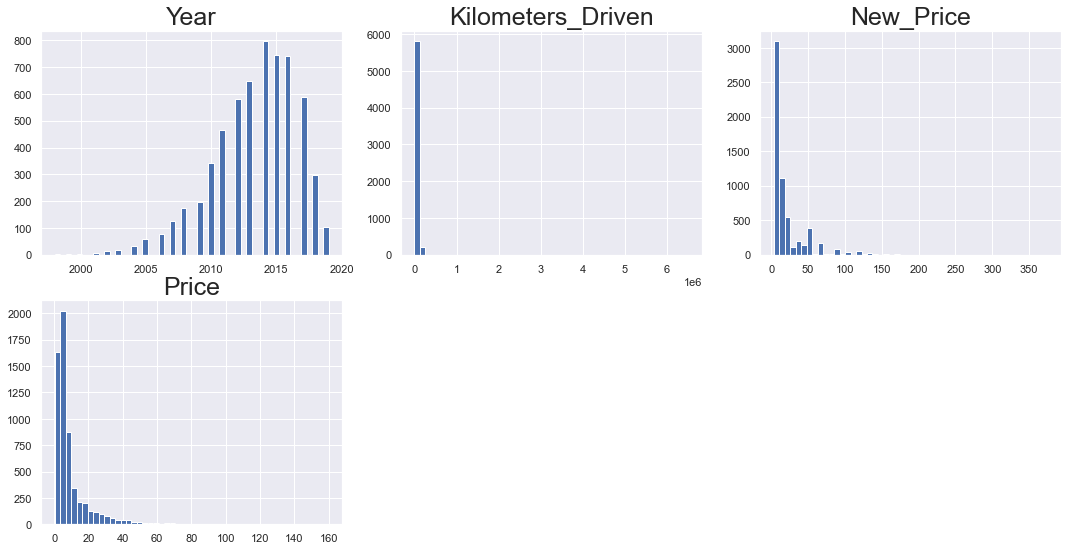

<IPython.core.display.Javascript object>

In [47]:
# creating a list of numeric columns
dist_cols = [
    item for item in df2.select_dtypes(include=np.number).columns if "tag" not in item
]

# Plotting a histogram of all numeric columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[dist_cols[i]], bins=50)
    # sns.histplot(data=df2, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

# (Greatlearning Login)

In [48]:
# creating a copy of the dataframe
df3 = df2.copy()

# removing Kilometers_Driven column as it only has 0 and 1 values
dist_cols.remove("Kilometers_Driven")

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [49]:
# using log transforms on some columns

for col in dist_cols:
    df3[col + "_log"] = np.log(df3[col] + 1)

# dropping the original columns
df3.drop(dist_cols, axis=1, inplace=True)
df3.head()

# (Greatlearning Login)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Year_log,New_Price_log,Price_log
0,Mumbai,72000,CNG,Manual,First,7.606387,1.873339,1.011601
1,Pune,41000,Diesel,Manual,First,7.608871,2.836737,2.602690
2,Chennai,46000,Petrol,Manual,First,7.606885,2.262804,1.704748
3,Chennai,87000,Diesel,Manual,First,7.607381,2.507157,1.945910
4,Coimbatore,40670,Diesel,Automatic,Second,7.607878,3.991573,2.930660


<IPython.core.display.Javascript object>

### Check for skewness after applying the log transformation.

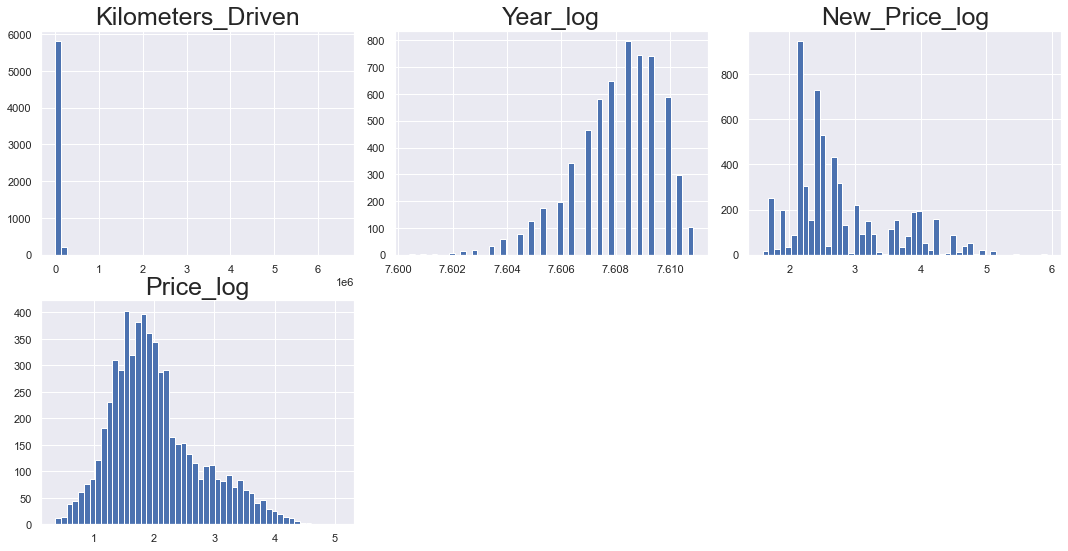

<IPython.core.display.Javascript object>

In [50]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df3.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df3[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

# (Greatlearning Login)

* The columns are still skewed, but not as heavily as before.

### Checking for correlations between the columns (other than the tag columns)

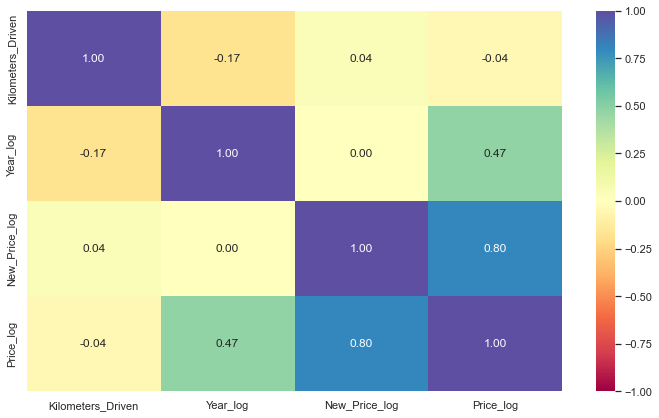

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df3[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# (Greatlearning Login)

* Both Price vs New Price and Price vs Year increased

## Model Building 

**Define dependent variable**

In [52]:
X = df3.drop(["Price_log"], axis=1)
y = df3["Price_log"]

# (Greatlearning Login)

<IPython.core.display.Javascript object>

### Creating dummy variables

In [53]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

# (Greatlearning Login)

,Kilometers_Driven,Year_log,New_Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,7.606387,1.873339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,41000,7.608871,2.836737,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,46000,7.606885,2.262804,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,87000,7.607381,2.507157,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,40670,7.607878,3.991573,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [54]:
X.shape

# (Greatlearning Login)

(6019, 21)

<IPython.core.display.Javascript object>

### Split the data into train and test

In [55]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [56]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

# (Greatlearning Login)

Number of rows in train data = 4213
Number of rows in test data = 1806


<IPython.core.display.Javascript object>

### Fitting a linear model

In [57]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

# (Greatlearning Login)

LinearRegression()

<IPython.core.display.Javascript object>

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and R2.

* We will define functions to calculate adjusted ***R2** and ***MAPE**.

    * The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
* We will create a function that will print out all the above metrics in one go.

In [58]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [59]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

# (Greatlearning Login)

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.255099,0.180708,0.883093,0.882507,10.813611


<IPython.core.display.Javascript object>

In [60]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

# (Greatlearning Login)

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.289587,0.176006,0.85193,0.850187,10.298279


<IPython.core.display.Javascript object>

### Observations

* The train and test ***R2** are 0.883 and 0.851, indicating that the model explains 88.3% and 85.0% of the total variation in the train and test sets respectively. Also, both scores are comparable
* **RMSE** values on the train and test sets are comparable.
* This shows that the model is not overfitting.
* **MAE** indicates that our current model can predict price within a mean error of 0.17 on the test set.
* **MAPE** of 10.2 on the test data means that we can predict within ~10% of the price.
* The overall performance is acceptable for train and test sets.


## Forward Feature Selection using SequentialFeatureSelector

We will see how to select a subset of important features with forward feature selection using SequentialFeatureSelector.

**Why should we do feature selection?**

* Reduces dimensionality
* Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalization)
* Speeds training/testing

**How does forward feature selection work?**

* It starts with an empty model and adds variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.

We'll use forward feature selection on all the variables

In [61]:
# Running mlxtend library
!pip install mlxtend

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [62]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

# (Greatlearning Login)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.8s finished

[2022-07-06 21:26:09] Features: 1/21 -- score: 0.6320093463547174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2022-07-06 21:26:09] Features: 2/21 -- score: 0.8567652317730534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished

[2022-07-06 21:26:10] Features: 3/21 -- score: 0.8625165962541118[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18

<IPython.core.display.Javascript object>

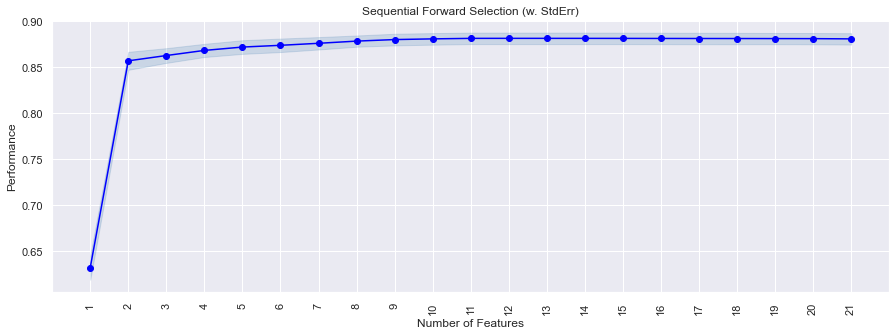

<IPython.core.display.Javascript object>

In [63]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

# (Greatlearning Login)

* We can see that performance increases till the ***11th** feature and then slowly becomes constant until the end of the 21st feature.
* The decision to choose the k_features now depend on the adjusted R2 vs the complexity of the model.
    * With ***11** features, we are getting an adjusted R2 of ***0.881**.
    * With ***19** features, we are getting an adjusted R2 of ***0.880**.
     
* The increase in adjusted R2 is not very significant as we are getting the same values with a less complex model.
* So, we'll use ***21** features only to build our model, but you can experiment by taking a different number.
* Number of features chosen will also depend on the business context and use case of the model.


In [64]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=21,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

# (Greatlearning Login)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2022-07-06 21:28:15] Features: 1/21 -- score: 0.6320093463547174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2022-07-06 21:28:15] Features: 2/21 -- score: 0.8567652317730534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished

[2022-07-06 21:28:15] Features: 3/21 -- score: 0.8625165962541118[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18

<IPython.core.display.Javascript object>

In [65]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

# (Greatlearning Login)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


<IPython.core.display.Javascript object>

In [66]:
# let us look at the names of the important features
x_train.columns[feat_cols]

# (Greatlearning Login)

Index(['Kilometers_Driven', 'Year_log', 'New_Price_log', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

<IPython.core.display.Javascript object>

### Now we will fit a sklearn model using these features only.

In [67]:
x_train_final = x_train[x_train.columns[feat_cols]]

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [68]:
# Creating new x_test with the same variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

# (Greatlearning Login)

<IPython.core.display.Javascript object>

In [69]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# (Greatlearning Login)

LinearRegression()

<IPython.core.display.Javascript object>

In [70]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

# (Greatlearning Login)

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.255099,0.180708,0.883093,0.882507,10.813611


<IPython.core.display.Javascript object>

In [71]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

# (Greatlearning Login)

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.289587,0.176006,0.85193,0.850187,10.298279


<IPython.core.display.Javascript object>

* The performance is comparable to the previous model.
* Let's compare the two models we built.

In [72]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

# (Greatlearning Login)

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.255099,0.255099
MAE,0.180708,0.180708
R-squared,0.883093,0.883093
Adj. R-squared,0.882507,0.882507
MAPE,10.813611,10.813611


<IPython.core.display.Javascript object>

In [127]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

# (Greatlearning Login)

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.289587,0.289587
MAE,0.176006,0.176006
R-squared,0.851930,0.851930
Adj. R-squared,0.850187,0.850187
MAPE,10.298279,10.298279


<IPython.core.display.Javascript object>

* The new model (lin_reg_model2) uses the same number of features as the previous model (lin_reg_model).
* The performance of the new model is close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.
* Both models are equal in performance

## Conclusions

* Using Linear Regression sklearn, we have been able to build a predictive model that can be used by Streamist to predict the price of used cars with an R2 of ***0.883** on the training set and ***0.851** on the test set.
* Streamist can use this model to predict the price within a mean error of **0.17**.
* Using Linear Regression sklearn (SFS features), we have been able to build a predictive model equal to Linear Regression sklearn.
* From the analysis, we found that the manufacturing year of each used car tend to increase the price of the car (later year models increase price). Lower kilometers drive also increases the price of used cars. Hence, quantity of used cars sold are associated with lower prices.

## Recommendations

* My recommendations for Cars4U are to procure newer model used cars, with low kilometers driven. These cars tend to be in high demand in the Indian market. 
* I would target markets like Coimbatore and Bangalore because these cities are selling used cars at higher price range.
* I recommend keeping a larger inventory of diesel fuel cars because diesel cars are the most popular and their price range is higher than all other fuel types.
* When it comes to volume, manual transmissions prices are lower than automatic but manual transmission have the most demand. Stay with the transmission that consumers demand (manual). 


# References

Greatlearning Login. https://olympus.mygreatlearning.com/login. 

“Law of Demand.” The Balance, https://www.thebalance.com/law-of-demand-definition-explained-examples-3305707.

Untitled. https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns.